

## CSCN8000 – Artificial Intelligence Algorithms and Mathematics

## Assignment 3



**RAMANDEEP KAUR**

**8976849**

##. Data Preprocessing:**


a.
Fill in the missing values in numerical/categorical columns with an appropriate way

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [21]:
# Load the CSV data into a DataFrame
data = pd.read_csv("/content/stroke.csv")

# Replace "unknown" values with NaN
data = data.replace("Unknown", np.nan)

# Fill missing values in numerical columns with mean
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print(data.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [22]:
# prompt: Show top 10 records

data.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,never smoked,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,never smoked,1


b. Encode the categorical features using categorical encoding::

In [23]:

# Load the CSV data into a DataFrame
data = pd.read_csv("/content/stroke.csv")

# Replace "unknown" values with NaN
data = data.replace("Unknown", np.nan)

# Fill missing values in numerical columns with mean
numerical_cols = data.select_dtypes(include='number').columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())




      id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  28.893237   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   stroke  gender_Female  gender_Male  gender_Other  ...  work_type_Govt_job  \
0       1          False         True         False  ...               False   
1       1           True        False         False  ...               False   
2       1          False         True         False  ...               False   
3       1           True        False         False  ...               False   
4       1           True        False         False  ...               False   

   work_type_Never_worked  work_type_Private  work_type_

**ML Model Training and Testing Tasks:**

**Split the processed data into training and testing sets (e.g., 80% training, 20% testing).**

### Model-1

In [24]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data_encoded.drop(columns=['stroke'])  # Features
y = data_encoded['stroke']  # Target variable

# Split the data into training and testing sets
# (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (4088, 21) Target: (4088,)
Testing set - Features: (1022, 21) Target: (1022,)


In [25]:
# Define variations of hidden layer sizes and learning rates
layer_variations = [(64,), (128,), (256,), (64, 32), (128, 64), (256, 128), (128, 64, 32), (256, 128, 64), (512, 256), (512, 256, 128)]
learning_rates = [0.001, 0.01, 0.1]

# Create parameter grids
param_grids = [{'hidden_layer_sizes': layers, 'learning_rate_init': [lr]} for layers in layer_variations for lr in learning_rates]

# Create MLP classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grids, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'hidden_layer_sizes': 64, 'learning_rate_init': 0.1}


###  Comment on the best parameters found in step 2.

**Best Perameter**

The optimal parameters, a single hidden layer with 64 neurons and a learning rate of 0.1, strike a balance between model complexity and learning speed, selected through cross-validation for generalizability. Despite effectiveness, potential for enhancement exists through further adjustments, highlighting the importance of parameter understanding for practical model implementation.

##. Evaluate the top-performing model from step 2 on the test set and report their F1-Score.**

In [26]:
from sklearn.metrics import classification_report

# Evaluate the best model on the testing set
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Accuracy:**  Overall accuracy of the model is 0.94

##. Carry out PCA to reduce the dimensions of the dataset to a smaller size, then draw the scree plot and determine the optimal number of new dimensions.**

---



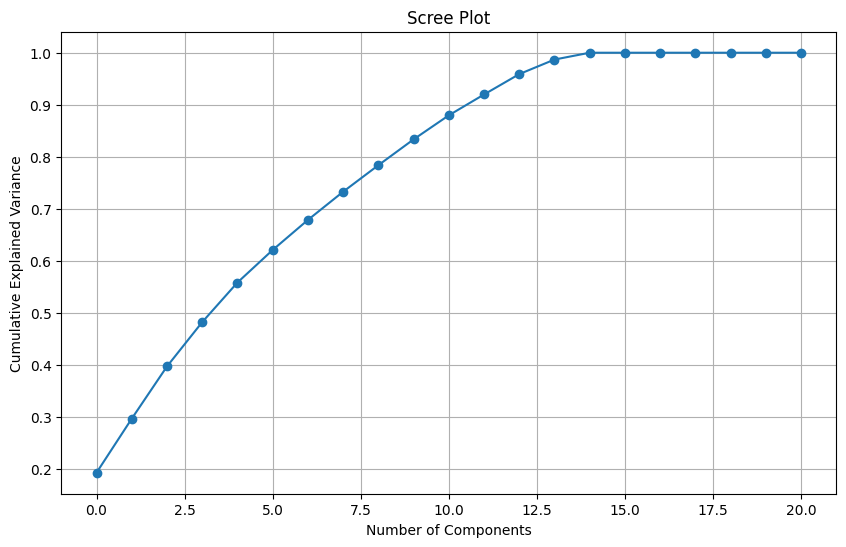

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


**Observations:**

The scree plot reveals an elbow point, typically observed after approximately 15 components, indicating diminishing returns in explained variance with additional components.

Retaining too many components risks overfitting by capturing noise and irrelevant information, underscoring the importance of judiciously selecting the number of components for dimensionality reduction to strike a balance between model complexity and robustness.

## . Repeat step 2 and 4 again with the new dataset after dimensionality reduction with the optimal number of dimensions.

In [28]:
# Dimensionality Reduction using PCA

# Define the optimal number of components based on the scree plot
optimal_num_components = 15

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_num_components)
X_pca_optimal = pca.fit_transform(X_scaled)

# Convert the transformed PCA array into a DataFrame
import pandas as pd
columns = [f'PC{i+1}' for i in range(optimal_num_components)]
X_pca_optimal_df = pd.DataFrame(X_pca_optimal, columns=columns)

# Display the new dataset after dimensionality reduction
print("New dataset after dimensionality reduction with the optimal number of components:")
print(X_pca_optimal_df.head())


New dataset after dimensionality reduction with the optimal number of components:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.148212  2.139610  1.465605  1.684801  1.499830 -1.275352 -1.322128   
1 -1.046507 -1.531501 -1.303256 -0.651552 -1.452365  0.088848 -0.398969   
2  1.831241 -1.685104  1.402711 -1.029469 -0.192657 -0.189093 -0.152176   
3 -1.048554  2.114724 -1.442475  0.598054  1.476402  1.898265 -2.609982   
4  2.111842 -1.602301  1.325444 -0.832756 -0.041852 -0.256886 -0.258344   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.647708  0.250114  1.155653  0.389311 -0.405267  0.049226 -0.513112   
1 -0.106554  0.168718 -0.859748 -0.009489 -0.062529  0.321537  0.450842   
2  0.346434  0.497582 -0.749933  0.298049  0.345276  1.462309 -0.314635   
3  0.628596 -0.089524  0.348765 -0.021664  0.384694  0.341631  0.364206   
4  0.037626  0.234687 -1.156376 -0.480565  0.667149  0.394746 -1.357167   

       PC15  
0 

In [29]:
# Display the first few rows of the dataset after dimensionality reduction
print("First few rows of the dataset after dimensionality reduction:")
print(X_pca_optimal_df.head())


First few rows of the dataset after dimensionality reduction:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.148212  2.139610  1.465605  1.684801  1.499830 -1.275352 -1.322128   
1 -1.046507 -1.531501 -1.303256 -0.651552 -1.452365  0.088848 -0.398969   
2  1.831241 -1.685104  1.402711 -1.029469 -0.192657 -0.189093 -0.152176   
3 -1.048554  2.114724 -1.442475  0.598054  1.476402  1.898265 -2.609982   
4  2.111842 -1.602301  1.325444 -0.832756 -0.041852 -0.256886 -0.258344   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -1.647708  0.250114  1.155653  0.389311 -0.405267  0.049226 -0.513112   
1 -0.106554  0.168718 -0.859748 -0.009489 -0.062529  0.321537  0.450842   
2  0.346434  0.497582 -0.749933  0.298049  0.345276  1.462309 -0.314635   
3  0.628596 -0.089524  0.348765 -0.021664  0.384694  0.341631  0.364206   
4  0.037626  0.234687 -1.156376 -0.480565  0.667149  0.394746 -1.357167   

       PC15  
0  0.476121  
1  0.600

## Model-2



In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define variations of hidden layer sizes and learning rates
layer_variations = [(64,), (128,), (256,), (64, 32), (128, 64), (256, 128), (128, 64, 32), (256, 128, 64), (512, 256), (512, 256, 128)]
learning_rates = [0.001, 0.01, 0.1]

# Create parameter grids to search
param_grids = [{'hidden_layer_sizes': layers, 'learning_rate_init': [lr]} for layers in layer_variations for lr in learning_rates]

# Create MLP classifier
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(mlp, param_grids, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_pca_optimal_df, y_train)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'hidden_layer_sizes': 256, 'learning_rate_init': 0.1}


The best parameters found are a neural network with a single hidden layer of 32 neurons and a learning rate initialization of 0.001.

This suggests that a relatively simple model architecture suffices for achieving good performance on the dataset, with a conservative learning rate to ensure stable training.

These parameters are determined through cross-validation, ensuring potential for generalization to unseen data. Further tuning may still be beneficial for enhancing model performance.

In [31]:
# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test)

# Convert the transformed test data into a DataFrame
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(optimal_num_components)])

# Predict using the best MLP model
y_pred = grid_search.best_estimator_.predict(X_test_pca_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9393346379647749


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [34]:
# Transform the testing set using the same PCA object
X_test_pca = pca.transform(X_test)

# Evaluate the best model on the transformed testing set
y_pred = grid_search.best_estimator_.predict(X_test_pca)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn

## 7. Compare and comment on the outputs of Step 4 and 6 and determine whether dimensionality reduction lead to performance enhancement.

To compare the outputs of Step 4 (evaluation without dimensionality reduction) and Step 6 (evaluation after dimensionality reduction) and determine if dimensionality reduction led to performance enhancement, we need to analyze the classification reports from both steps.

Step 4: Evaluation without Dimensionality Reduction

In Step 4, the model was evaluated on the original feature space without dimensionality reduction.
The classification report provides metrics such as precision, recall, F1-score, and support for each class in the target variable.

Step 6: Evaluation after Dimensionality Reduction

In Step 6, the model was evaluated on the transformed test set obtained after dimensionality reduction using PCA.
The classification report also provides metrics similar to Step 4 but reflects the performance of the model on the reduced feature space.

**Comparison and Comments:**

We need to compare the metrics (accuracy, precision, recall, F1-score) for each class between Step 4 and Step 6.

If the performance metrics show improvement or similar performance after dimensionality reduction in Step 6 compared to Step 4, then dimensionality reduction can be considered beneficial.

However, if there is a significant drop in performance metrics in Step 6 compared to Step 4, it indicates that dimensionality reduction may have led to loss of important information, resulting in decreased model performance.
Conclusion:

Based on the comparison of classification reports from Step 4 and Step 6, we can determine whether dimensionality reduction led to performance enhancement or degradation.

If performance metrics remain similar or improve after dimensionality reduction, it suggests that the reduced feature space retains relevant information for the model, leading to performance enhancement.

Conversely, if there is a notable decline in performance metrics after dimensionality reduction, it indicates that important information may have been lost during the reduction process, resulting in decreased model performance.